<a href="https://colab.research.google.com/github/jdre1/Machine-Learning-Bootcamp/blob/main/supervised/01_basic/train_valid_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

np.random.seed(42)
np.set_printoptions(edgeitems=30, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set()
sklearn.__version__

'1.0.2'

In [67]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [68]:
raw_data_copy

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [48]:
data = raw_data_copy['data']
target = raw_data_copy['target']

In [78]:
print(f"Data:\n{data[:5]}")
print(f"Target:\n{target[:5]}")

Data:
[[5.10 3.50 1.40 0.20]
 [4.90 3.00 1.40 0.20]
 [4.70 3.20 1.30 0.20]
 [4.60 3.10 1.50 0.20]
 [5.00 3.60 1.40 0.20]]
Target:
[0 0 0 0 0]


##### Concatenation of two arrays Data (two-dimensional) and Target (one- dimensional)

In [79]:
all_data = np.c_[data, target]

In [80]:
all_data

array([[5.10, 3.50, 1.40, 0.20, 0.00],
       [4.90, 3.00, 1.40, 0.20, 0.00],
       [4.70, 3.20, 1.30, 0.20, 0.00],
       [4.60, 3.10, 1.50, 0.20, 0.00],
       [5.00, 3.60, 1.40, 0.20, 0.00],
       [5.40, 3.90, 1.70, 0.40, 0.00],
       [4.60, 3.40, 1.40, 0.30, 0.00],
       [5.00, 3.40, 1.50, 0.20, 0.00],
       [4.40, 2.90, 1.40, 0.20, 0.00],
       [4.90, 3.10, 1.50, 0.10, 0.00],
       [5.40, 3.70, 1.50, 0.20, 0.00],
       [4.80, 3.40, 1.60, 0.20, 0.00],
       [4.80, 3.00, 1.40, 0.10, 0.00],
       [4.30, 3.00, 1.10, 0.10, 0.00],
       [5.80, 4.00, 1.20, 0.20, 0.00],
       [5.70, 4.40, 1.50, 0.40, 0.00],
       [5.40, 3.90, 1.30, 0.40, 0.00],
       [5.10, 3.50, 1.40, 0.30, 0.00],
       [5.70, 3.80, 1.70, 0.30, 0.00],
       [5.10, 3.80, 1.50, 0.30, 0.00],
       [5.40, 3.40, 1.70, 0.20, 0.00],
       [5.10, 3.70, 1.50, 0.40, 0.00],
       [4.60, 3.60, 1.00, 0.20, 0.00],
       [5.10, 3.30, 1.70, 0.50, 0.00],
       [4.80, 3.40, 1.90, 0.20, 0.00],
       [5.00, 3.00, 1.60,

In [81]:
df = pd.DataFrame(data=all_data, columns = raw_data.feature_names + ['target'])

In [82]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [83]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [88]:
df.describe().T.apply(lambda x: round(x, 2))

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
target,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


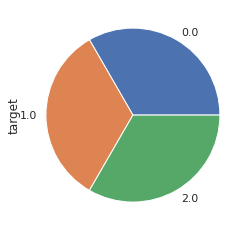

In [96]:
df['target'].value_counts().plot(kind='pie')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb150fbfb10>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb14f4e3810>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7fb14f31c750>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb151218cd0>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7fb14f1c0210>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb14f177810>]], dtype=object)

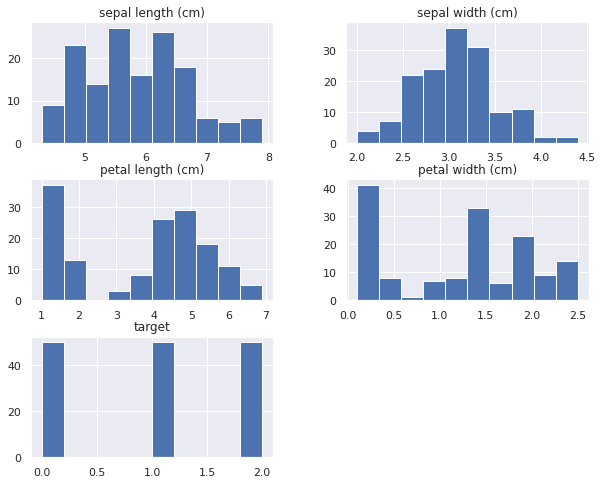

In [103]:
df.hist(figsize=[10,8])